# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

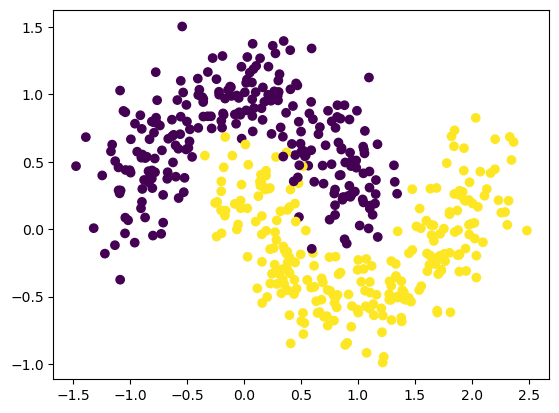

In [4]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [6]:
X, y = moons_points, moons_labels

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

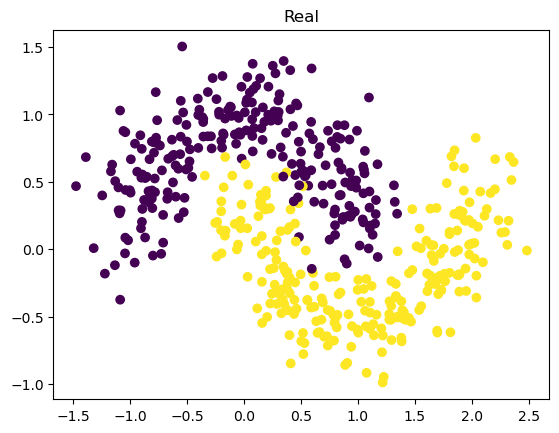

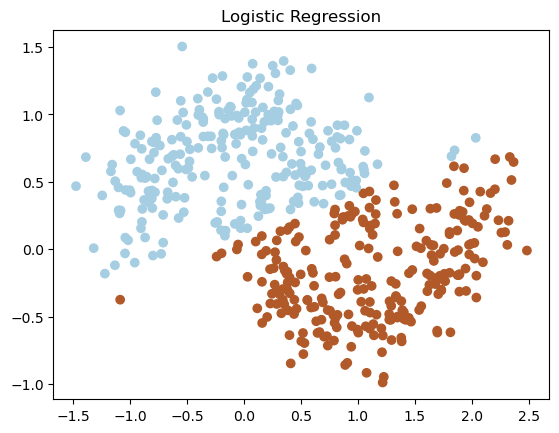

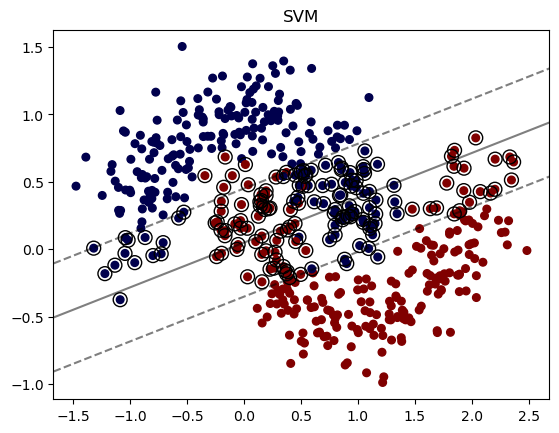

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns


def plot_svm_boundary(model,X,y):
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('SVM')
    plt.show()


lr = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, solver='saga')  # add some params
svm = SVC(kernel="linear")  # here too

lr.fit(X, y)
svm.fit(X, y)

plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.title('Real')
plt.show()

y_lr_pred = lr.predict(X)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c = y_lr_pred, cmap = 'Paired')
plt.title('Logistic Regression')
plt.show()

plot_svm_boundary(svm,X,y)

Как можно видеть на графиках SVM и Logistic Regression способны линейно разделять данные, поэтому в случае более сложной формы эти методы уже не способны праивльно провести разделяющую границу.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [106]:
from sklearn.metrics import classification_report

Для начала попробуем поиграться степенями и параметром регуляризации C с ядром 'poly'.

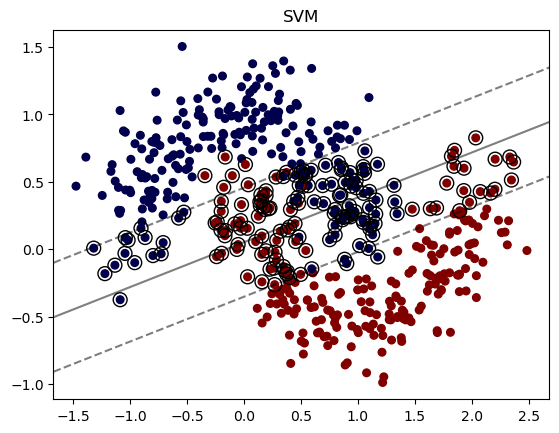

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       250
           1       0.87      0.85      0.86       250

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [110]:
svm = SVC(kernel = 'poly', degree = 1, C = 1)
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

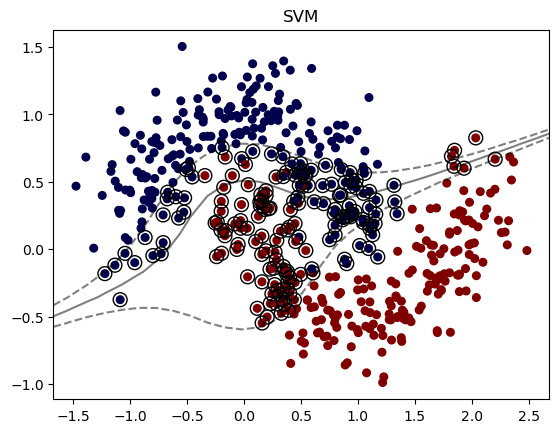

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       250
           1       0.87      0.96      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [112]:
svm = SVC(kernel = 'poly', degree = 3, C = 1)
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

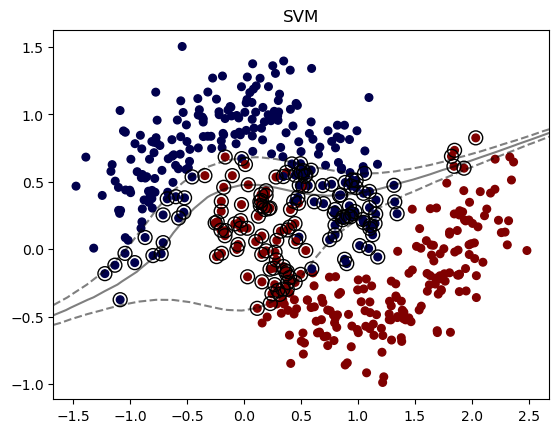

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       250
           1       0.86      0.95      0.90       250

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [114]:
svm = SVC(kernel = 'poly', degree = 3, C = 10)
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

Как можно видеть ядро 'poly' плохо разделяет точки, даже при различных параметрах. Попробуем другие ядра.

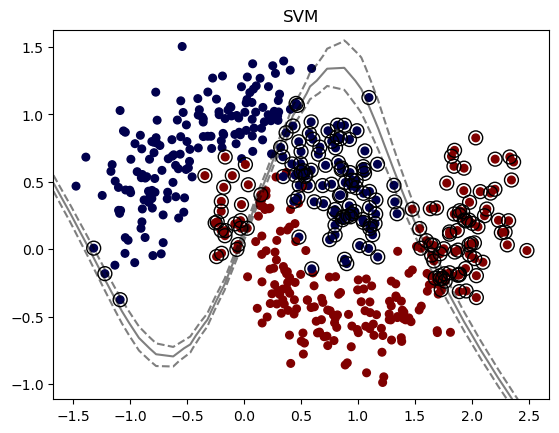

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       250
           1       0.65      0.65      0.65       250

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



In [116]:
svm = SVC(kernel = 'sigmoid', C = 1, gamma = 'scale')
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

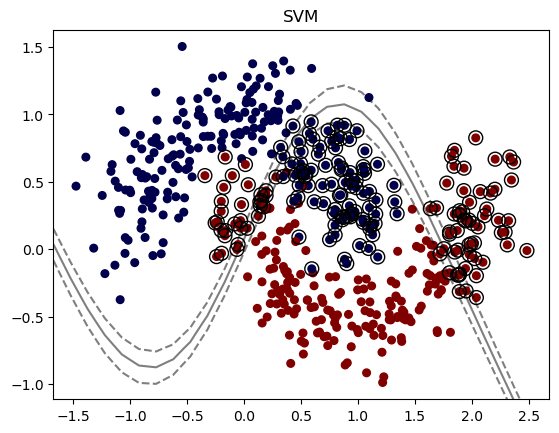

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       250
           1       0.67      0.70      0.69       250

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500



In [118]:
svm = SVC(kernel = 'sigmoid', C = 1, gamma = 'auto')
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

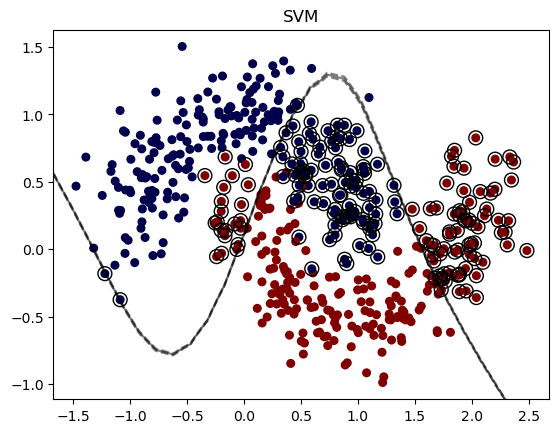

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       250
           1       0.64      0.64      0.64       250

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



In [120]:
svm = SVC(kernel = 'sigmoid', C = 10, gamma = 'scale')
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

Ядро 'sigmoid' так же не очень подходит. Попробуем 'rbf'.

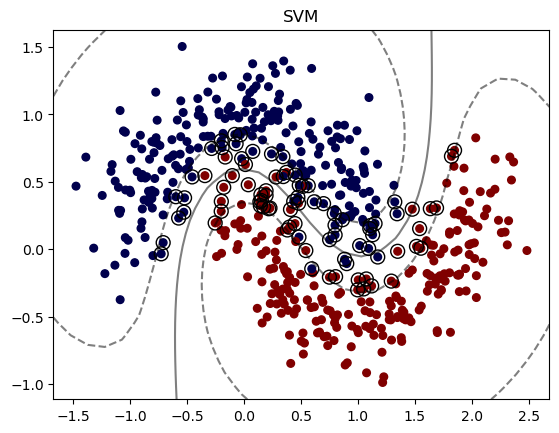

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       250
           1       0.98      0.97      0.97       250

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [122]:
svm = SVC(kernel = 'rbf', C = 1, gamma = 'scale')
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

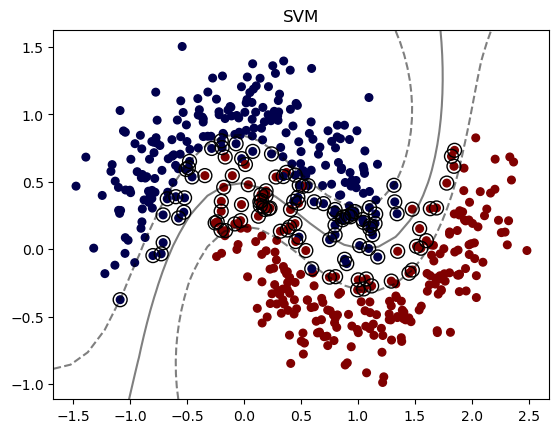

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       250
           1       0.98      0.96      0.97       250

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [124]:
svm = SVC(kernel = 'rbf', C = 1, gamma = 'auto')
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

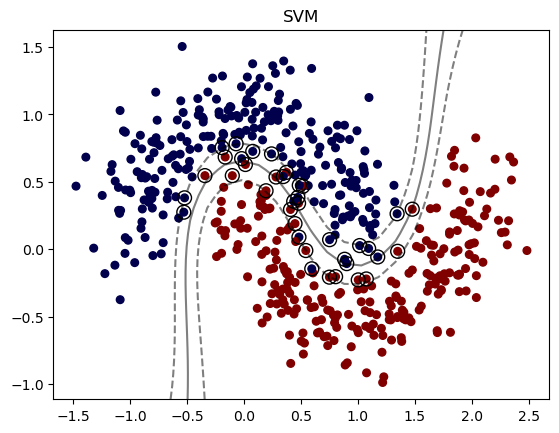

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       250
           1       0.99      0.98      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [126]:
svm = SVC(kernel = 'rbf', C = 50, gamma = 'auto')
svm.fit(X, y)
plot_svm_boundary(svm,X,y)
y_pred = svm.predict(X)
print(classification_report(y, y_pred))

Как можно видеть, 'rbf' достаточно хорошо разделяет данные. Так же видно, что последние параметры задает наилучшую разделяющую плоскость.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

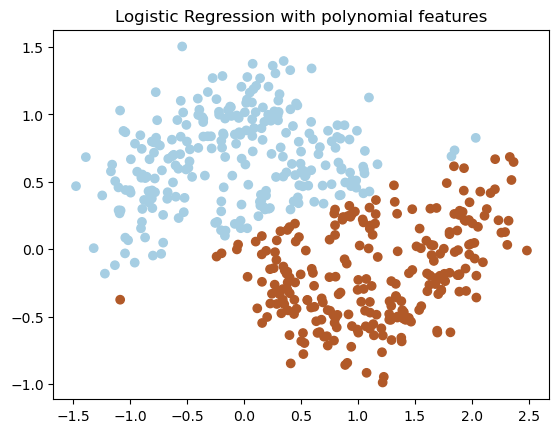

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       250
           1       0.87      0.85      0.86       250

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



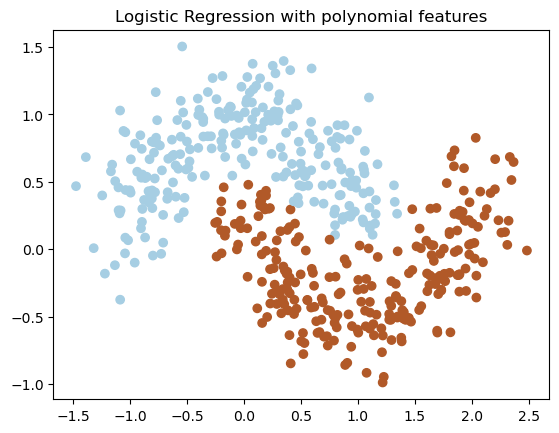

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       250
           1       0.97      0.97      0.97       250

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



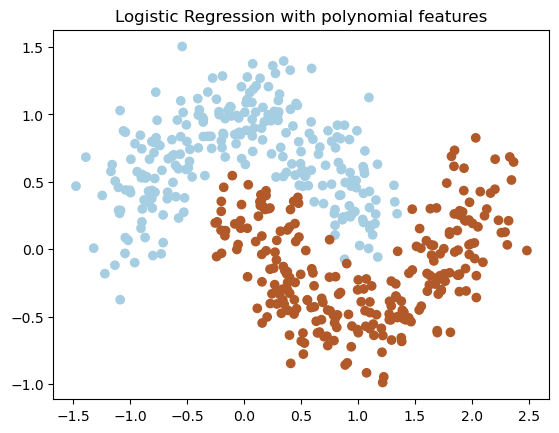

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.98      0.98      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


def poly_model(degree):
    polynomial_converter = PolynomialFeatures(degree = degree)
    poly_features = polynomial_converter.fit_transform(X)
    model = LogisticRegression()
    model.fit(poly_features, y)
    y_pred = model.predict(poly_features)

    plt.scatter(moons_points[:, 0], moons_points[:, 1], c = y_pred, cmap = 'Paired')
    plt.title('Logistic Regression with polynomial features')
    plt.show()
    print(classification_report(y, y_pred))


poly_model(2)
poly_model(3)
poly_model(10)

Вторая степень PolyFeatures практически никак не отличается от классической линейной регрессии, что видно на первой картинке. Третья степень признаков намного лучше их классифицирует, что видно и по accuracy и по второй картинке. Увеличивая степень до 10 мы улучшаем accuracy и остальные метрики, однако это не соразмерно сложности модели. Так что оптимальным вариантом является degree = 3.

Что касается сравнения с SVM, то метрики практически идентичные с accuracy = 0.98. Поскольку классы сбалансированные это достаточно хороший показатель для сравнения. 

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

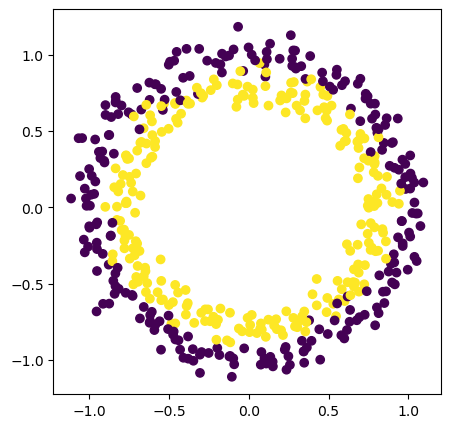

In [160]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

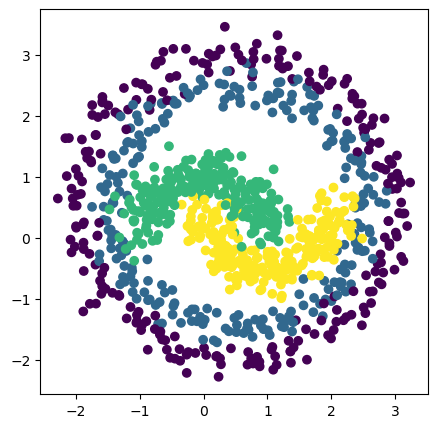

In [162]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [209]:
X, y = points, labels

Для начала рассмотрим полиномиальные признаки. Для этого воспользуемся функцией, созданной выше, однако здесь больше признаков, поэтому немного ее адаптируем.

In [202]:
from scikitplot.metrics import plot_roc

def poly_model(degree):
    polynomial_converter = PolynomialFeatures(degree = degree)
    poly_features = polynomial_converter.fit_transform(X)
    model = LogisticRegression()
    model.fit(poly_features, y)
    y_pred = model.predict(poly_features)

    plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
    plt.title('Logistic Regression with polynomial features')
    plt.show()

    y_pred_proba = model.predict_proba(poly_features)
    plot_roc(y, y_pred_proba)
    plt.show()
    

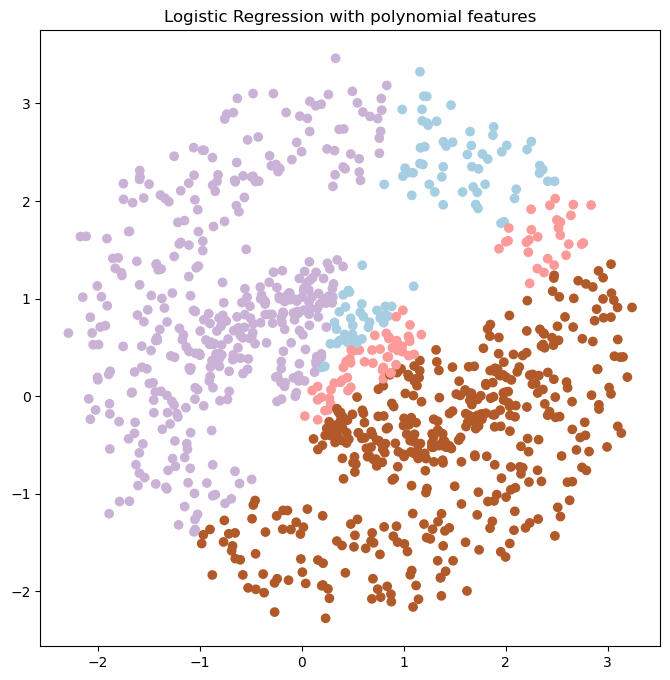

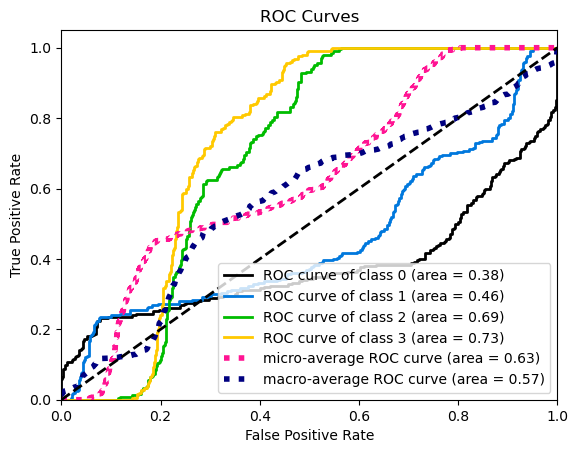

In [206]:
plt.figure(figsize=(8,8))
poly_model(1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


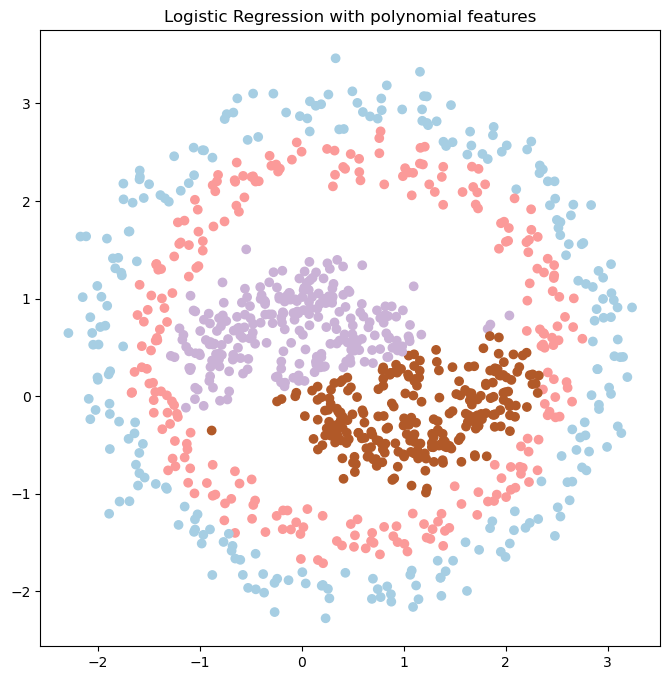

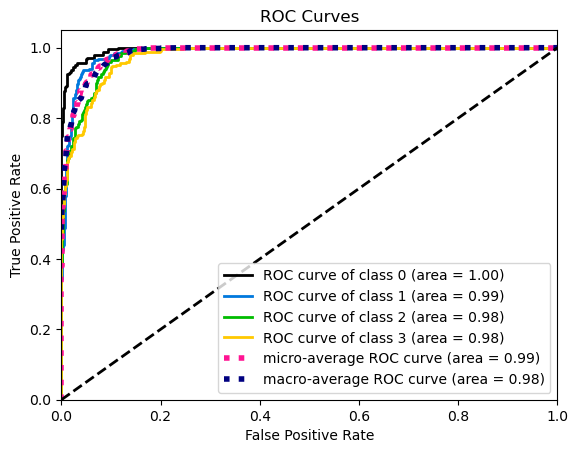

In [214]:
plt.figure(figsize=(8,8))
poly_model(2)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


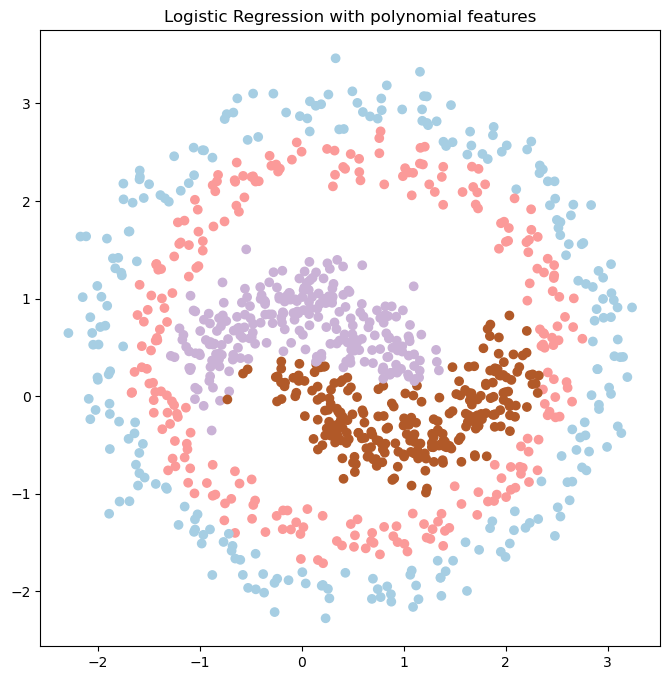

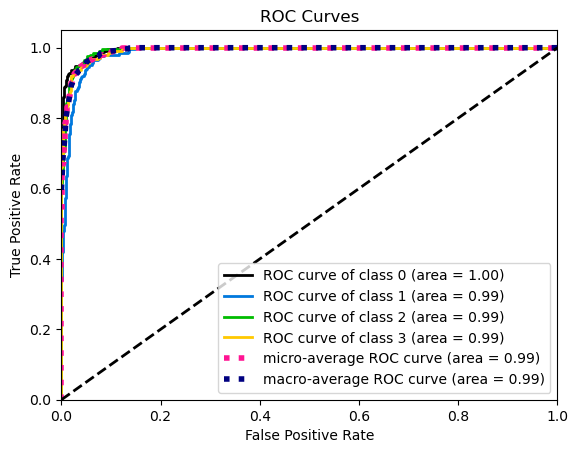

In [216]:
plt.figure(figsize=(8,8))
poly_model(3)

Степени polynomial features большие 1 неплохо проводят классификацию. Наилучшие показатели на последней картинке со степенью polynomial features равной 3. 

Рассмотрим SVM:

In [236]:
from sklearn.metrics import accuracy_score

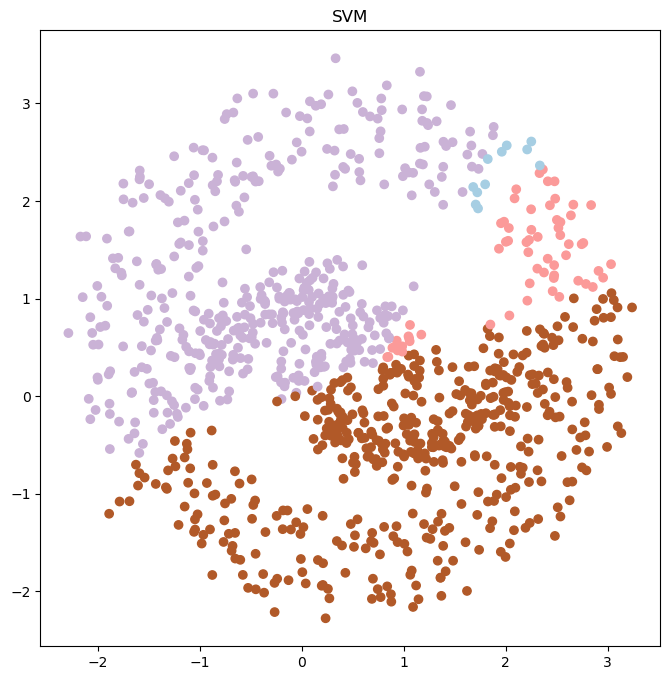

              precision    recall  f1-score   support

           0       0.55      0.02      0.05       250
           1       0.35      0.09      0.14       250
           2       0.45      0.81      0.58       250
           3       0.44      0.84      0.58       250

    accuracy                           0.44      1000
   macro avg       0.45      0.44      0.34      1000
weighted avg       0.45      0.44      0.34      1000



In [290]:
svm = SVC(kernel = 'poly', degree = 1, C = 1, gamma = 'scale')
svm.fit(X, y)
y_pred = svm.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM')
plt.show()

print(classification_report(y, y_pred))

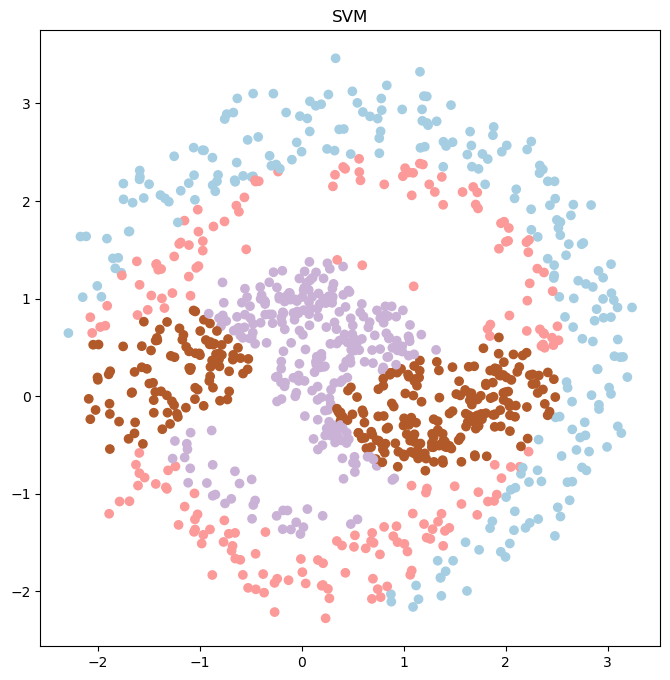

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       250
           1       0.61      0.48      0.54       250
           2       0.58      0.64      0.61       250
           3       0.53      0.62      0.57       250

    accuracy                           0.61      1000
   macro avg       0.62      0.61      0.61      1000
weighted avg       0.62      0.61      0.61      1000



In [294]:
svm = SVC(kernel = 'poly', degree = 2, C = 1, gamma = 'scale')
svm.fit(X, y)
y_pred = svm.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM')
plt.show()

print(classification_report(y, y_pred))

Выше рассмотрены случаи с ядром 'poly'. Как можно видеть degree = 1 дает accuracy = 0.44, а degree = 2 дает accuracy = 0.61. Однако все равно это слишком маленкий результат, поэтому рассмотрим другии ядра.

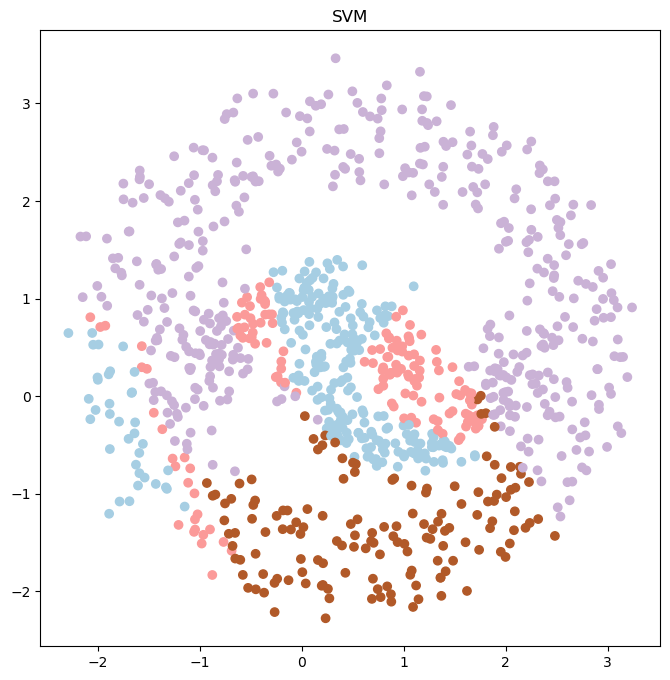

              precision    recall  f1-score   support

           0       0.12      0.13      0.12       250
           1       0.07      0.04      0.05       250
           2       0.16      0.28      0.20       250
           3       0.15      0.09      0.11       250

    accuracy                           0.14      1000
   macro avg       0.13      0.14      0.12      1000
weighted avg       0.13      0.14      0.12      1000



In [297]:
svm = SVC(kernel = 'sigmoid', C = 1, gamma = 'auto')
svm.fit(X, y)
y_pred = svm.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM')
plt.show()

print(classification_report(y, y_pred))

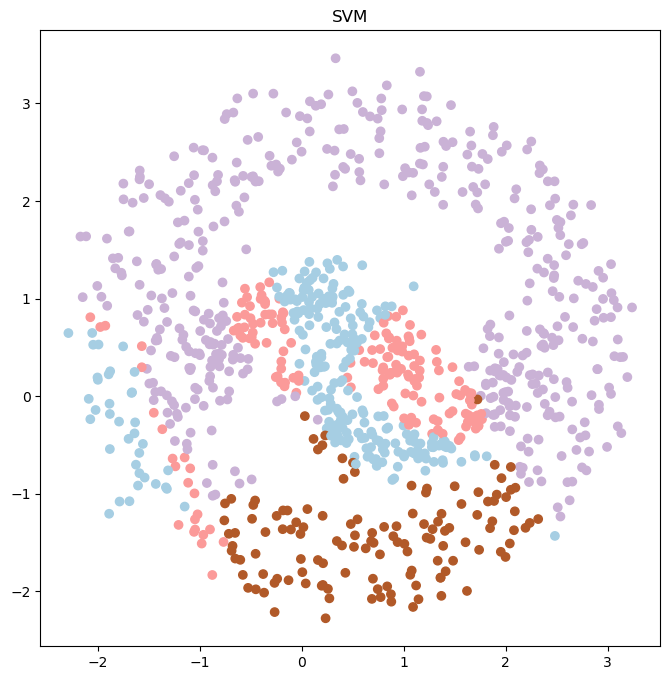

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       250
           1       0.06      0.04      0.05       250
           2       0.15      0.27      0.19       250
           3       0.10      0.05      0.07       250

    accuracy                           0.12      1000
   macro avg       0.11      0.12      0.11      1000
weighted avg       0.11      0.12      0.11      1000



In [299]:
svm = SVC(kernel = 'sigmoid', C = 10, gamma = 'auto')
svm.fit(X, y)
y_pred = svm.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM')
plt.show()

print(classification_report(y, y_pred))

Ядро 'sigmoid' очень плохо классифицирует объекты, даже при различных параметрах 'C'.

Рассмотрим ядро 'rbf':

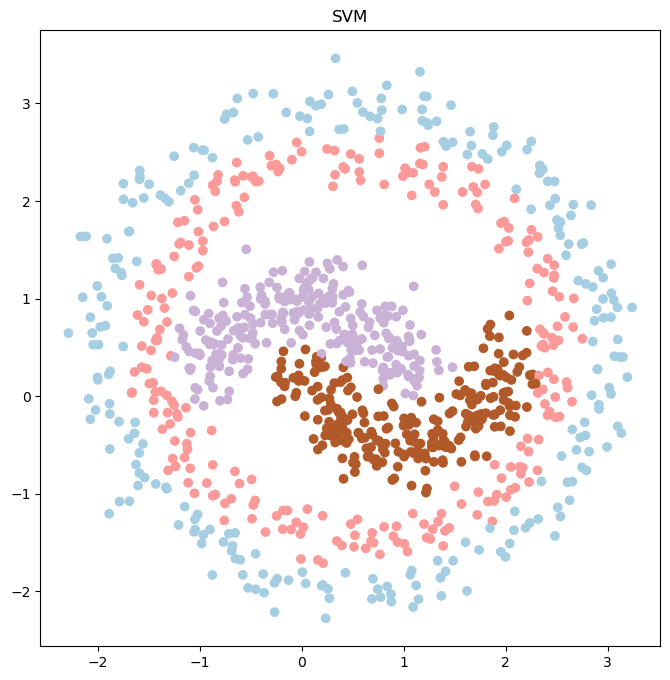

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       250
           1       0.89      0.91      0.90       250
           2       0.96      0.95      0.95       250
           3       0.96      0.94      0.95       250

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [342]:
svm = SVC(kernel = 'rbf', C = 1, gamma = 'auto')
svm.fit(X, y)
y_pred = svm.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM')
plt.show()

print(classification_report(y, y_pred))

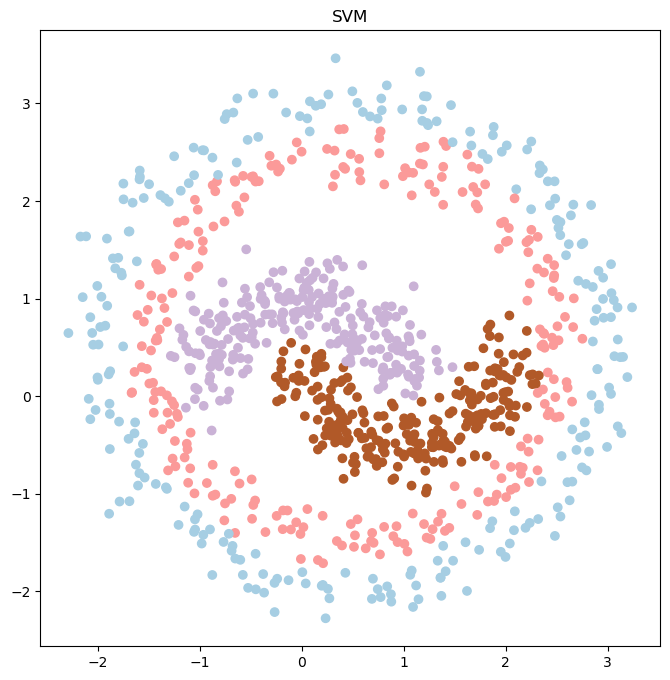

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       250
           1       0.90      0.91      0.91       250
           2       0.96      0.96      0.96       250
           3       0.96      0.95      0.95       250

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [344]:
svm = SVC(kernel = 'rbf', C = 10, gamma = 'auto')
svm.fit(X, y)
y_pred = svm.predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM')
plt.show()

print(classification_report(y, y_pred))

Как можно видеть ядро 'rbf' намного лучше проводит классификацию. Accuracy в этом случае равна  0.94(при усовии, что параметр С = 10). Однако этот результат все равно хуже, чем LR с полиномиальными признаками. 


Попробуем сделать SVM с полиномиальными признаками со степенью 10:

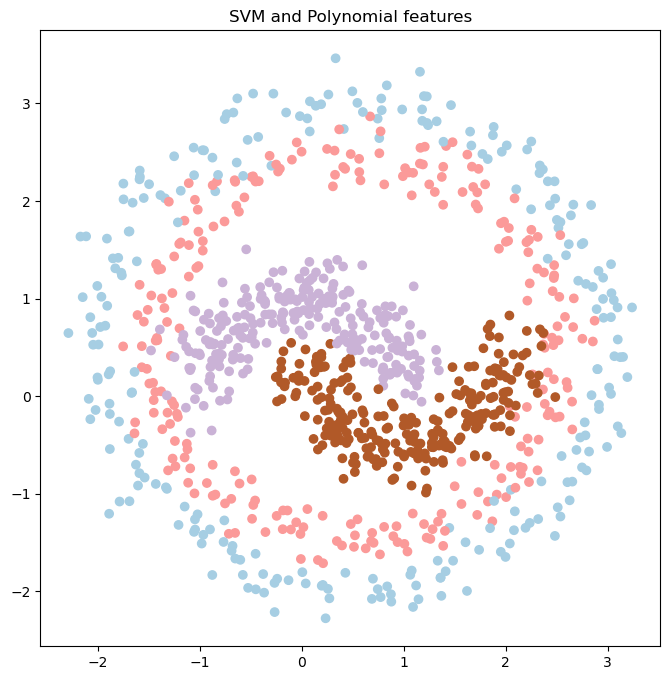

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250
           2       0.98      0.97      0.97       250
           3       0.97      0.98      0.98       250

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [346]:
svm = SVC(kernel = 'rbf', C = 10, gamma = 'auto')
polynomial_converter = PolynomialFeatures(degree = 10)
poly_features = polynomial_converter.fit_transform(X)
svm.fit(poly_features, y)
y_pred = svm.predict(poly_features)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
plt.title('SVM and Polynomial features')
plt.show()

print(classification_report(y, y_pred))

Здесь accuracy = 0.99, более того 0 и 1 класс был определен со 100% вероятностью. Поэтому эта модель является самой лучшей для нашей задачи.